This notebook, by [felipe.alonso@urjc.es](mailto:felipe.alonso@urjc.es)

In this notebook we will:

1. Solve one-sample hypothesis testing examples:
    - hypothesis testing for the mean
    - hypothesis testing for proportions 
2. Solve two-sample hypothesis testing examples

# 0. Load libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import t, sem, norm

# 1. One sample hypothesis testing

### Example 1:

Load the data set `mtcars` contained in the `./data/mtcars.csv` file of this repository. Assume that the data set `mtcars` is a random sample. Compute the mean MPG, $\bar{x}$, of this sample. You want to test whether the true MPG is $\mu_0$ or smaller using a one sided $5\%$ level test. Thus, you want to test 

$$H_0:\mu = \mu_0\quad\text{ vs.}\quad H_1:\mu<\mu_0$$ 

<div class="alert alert-block alert-info">
Based on the mean MPG of the sample $\bar{x}$, what is the smallest value of $\mu_0$ that you would reject $H_0$ for?
</div>

In [2]:
# Your code here
# ...

# load data
mtcars = pd.read_csv('./data/mtcars.csv',sep=',', decimal='.')

# get variables of interest
x = mtcars.mpg.values
n = len(x)
alpha = 0.05

# do calculation
mu_0 = x.mean()-t(df=n-1).ppf(alpha)*sem(x)

print('The smallest value is', mu_0.round(3))

# Your solution should be: 21.897

The smallest value is 21.897


### Example 2:

A survey claims that $9$ out of $10$ doctors recommend aspirin for their patients with headaches. To test this claim, a random sample of $100$ doctors is obtained. Of these $100$ doctors, $82$ indicate that they recommend aspirin.

<div class="alert alert-block alert-info">
Is this claim accurate? Use $\alpha$ = 0.05
</div>

Hint: you might want to use the [`binom_test`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom_test.html#scipy.stats.binom_test). Notice that this is an exact test, and does not assume normality.

In [3]:
# Your code here
# ...

# Our hypothesis would be H0: p0 = 0.9 vs H1: p0 != 0.9 (two-sided)
p_hat = 82/100
p0 = 0.9
n = 100

#Since 100*p0*(1-p0) > 5, we can use the Normal approximation
z = (p_hat - p0)/np.sqrt(p0*(1-p0)/n)

th = norm().ppf(0.975)

if np.abs(z) > th:
     print('We reject the null hypothesis H0')
else:
    print('We accept the null hypothesis H0')

# We can calculate the p-value:
p_value = 2*norm().cdf(-np.abs(z))
print('P-value:', p_value)

# Exact test
from scipy.stats import binom_test
p_v = binom_test(x = 82, n=100 , p=0.9)
print('P-value:', p_v)

We reject the null hypothesis H0
P-value: 0.00766076113517941
P-value: 0.01195216391400506


### Example 3: 

You believe the coin that you’re flipping is biased towards heads. You get $55$ heads out of $100$ flips. 

<div class="alert alert-block alert-info">
Do you reject at the $5\%$ level that the coin is fair?
</div>

In [4]:
# Your code here
# ...

# Our hypothesis would be H0: p0 = 0.5 vs H1: p0 > 0.5 (one-sided)

# We can use the binomial test
p_value = binom_test(x = 55, n=100 , p=0.5, alternative = 'greater')

print('P-value:', p_value)

if p_value < 0.05:
    print('We reject the null hypothesis H0')
else:
    print('We accept the null hypothesis H0, therefore the coin is fair')

P-value: 0.18410080866334827
We accept the null hypothesis H0, therefore the coin is fair


# 2. Two sample hypothesis testing

### Example 4

[Tromholt (2016)](https://www.liebertpub.com/doi/full/10.1089/cyber.2016.0259) investigated whether quitting Facebook can improve your well-being. In the experiment, about a thousand volunteers (all Facebook users) were randomly allocated to either a treatment group, in which they told not to use Facebook for one week, or a control group, in which they carried on using Facebook as normal. At the end of the week, all participants completed a questionnaire. One of the questions asked them to record, “*In general, how satisfied are you with your life today?*” on a scale of 1 (very dissatisfied) to 10 (very satisfied). Let  $x_1,x_2,\ldots,x_n$ be the observed responses in the treatment group, and $y_1,y_2,\ldots,y_n$ be the observed responses in the control group. Results from those who repsponded were as follows:

$$\bar{x} = 8.11,\,\bar{y} = 7.74,\,s_x =1.23^2,\,s_y = 1.43^2,\,n = 516,\,m=372$$


<div class="alert alert-block alert-info">
State suitable hypotheses for the experiment. Conduct an appropriate hypothesis test, reporting the  
$p-$value.
</div>

In [5]:
# Your code here
# ...

# Our hypothesis would be H0: mu_x = mu_y vs H1: mu_x != mu_y
# We will use the t-test for independent samples with unknown and unequal variances, thus

n = 516
m = 372
sx2 = 1.23**2
sy2 = 1.43**2

# slide 21
ts = (8.11-7.74)/np.sqrt(sx2/n + sy2/m)
d  = (sx2/n + sy2/m)**2 / ( (sx2/n)**2/(n-1) + (sy2/m)**2/(m-1) )

th = t(df = d).ppf(0.975)

if np.abs(ts) > th: 
    print('We reject the null hypothesis H0')
else:
    print('We accept the null hypothesis H0')
    
# p-value
p_value = 2*t(df=d).cdf(-1*np.abs(ts))
print('P-value:', p_value)


# Your p-value solution should be: 6.166126520490217e-05

We reject the null hypothesis H0
P-value: 6.166126520490217e-05


### Example 5

Consider again the `mtcars` data set. Use a two sample $t-$test to test the hypothesis that the $4$ and $6$ `CYL` cars have the same `MPG`. Notice that `CYL` refers to a column of the `mtcars` data set.

<div class="alert alert-block alert-info">
Do you reject at the $5\%$ confidence level? What's the $p-$value?
</div>

Hint: you might find [`ttest_ind`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.ttest_ind.html) function useful.


In [6]:
from scipy.stats import ttest_ind

# your code here


x = mtcars[mtcars.cyl==4].mpg.values
y = mtcars[mtcars.cyl==6].mpg.values

# So, the hypothesis would be H0: mu_x = mu_y vs H1: mu_x != mu_y

#--- Approach 1: code the test
x_bar = x.mean()
y_bar = y.mean()

sx2 = np.std(x,ddof=1)**2
sy2 = np.std(y,ddof=1)**2

n = len(x)
m = len(y)

# We will use the t-test for independent samples with unknown and unequal variances, thus
ts = (x_bar-y_bar)/np.sqrt(sx2/n + sy2/m)
d  = (sx2/n + sy2/m)**2 / ( (sx2/n)**2/(n-1) + (sy2/m)**2/(m-1) )
print('Statistic:',ts)


th = t(df = d).ppf(0.975)

if np.abs(ts) > th: 
    print('We reject the null hypothesis H0')
else:
    print('We accept the null hypothesis H0')
    
# p-value
p_value = 2*t(df=d).cdf(-1*np.abs(ts))
print('P-value:', p_value)
# --- 


# Approach 2: use ttest_ind
t_s, p_value = ttest_ind(x, y, equal_var=False)
print('Statistic:',t_s)
print('P-value:',p_value)

# Your p-value solution should be: 0.00040484953417022697

Statistic: 4.719059404187968
We reject the null hypothesis H0
P-value: 0.00040484953417022697
Statistic: 4.719059404187968
P-value: 0.00040484953417022697


### Example 6:

Patients with type-2 diabetes may use drugs to control their blood sugar levels. A pharmaceutical company conducted a clinical trial to compare the efficacy of a combination of two drugs, *sitagliptin* and *metformin*, with using *metformin* alone. The product name for this combination of drugs is “Efficib”. 190 patients were recruited to the trial, and were randomly allocated to one of two treatments:

- treatment 1: 100mg sitagliptin per day, and at least 1500mg metformin per day
- treatment 2: a daily placebo, made to look like a dose of 100mg sitagliptin, and at least 1500mg metformin per day.

The study was “double-blinded”: neither the patients nor their doctors knew which treatment they were getting (though the trial investigators did know.) A1C (a measure of blood sugar level) was recorded for each patient at the start and after 18 weeks, and the change in A1C was recorded for each patient.

Let $X_i$ denote the change in A1C for the $i-$th patient on the treatment 1 ($i=1,\ldots,95$), and $Y_j$  denote the change in A1C the $j-$th patient on treatment 2 ($j=1,\ldots,92$). We assume that $X_i\sim\mathcal{N}(\mu_x,\sigma_x^2)$ and that $Y_i\sim\mathcal{N}(\mu_y,\sigma_y^2)$. 

We have the following information:

$$\bar{x} = -1.00,\,\bar{y} = 0.02,\,s_x^2 =1.5456,\,s_y^2 = 1.4968,\,n = 95,\,m=92$$


<div class="alert alert-block alert-info">
State suitable hypotheses for the experiment. Conduct an appropriate hypothesis test, reporting the  
$p-$value.
</div>

In [7]:
# Your code here
# ...

# Our hypothesis would be H0: mu_x = mu_y vs H1: mu_x != mu_y
# We will use the t-test for independent samples with unknown and unequal variances, thus

n = 95
m = 92
sx2 = 1.5456
sy2 = 1.4968

# slide 21
ts = (-1-0.02)/np.sqrt(sx2/n + sy2/m)
d  = (sx2/n + sy2/m)**2 / ( (sx2/n)**2/(n-1) + (sy2/m)**2/(m-1) )

print(ts,d)
th = t(df = d).ppf(0.975)

if np.abs(ts) > th: 
    print('We reject the null hypothesis H0')
else:
    print('We accept the null hypothesis H0')
    
# p-value
p_value = 2*t(df=d).cdf(-1*np.abs(ts))
print('P-value:', p_value)

-5.654546908421991 184.95133447616834
We reject the null hypothesis H0
P-value: 5.846043953288385e-08


Thus, there is evidence (at the 5% level of significance) that there is an effect of combining sitagliptin with metformin, and that this effect is an increased reduction in A1c (adding sitagliptin has a beneficial effect.)

There have been other studies to test the effect of sitagliptin and metformin (the “Efficib” drug). Based on these studies, the [European Medicines Agency approved Efficib for use in the European Union](https://www.ema.europa.eu/en/medicines/human/EPAR/efficib).

### Example 7:

The file `./data/textbooks.csv` contain [information](https://www.openintro.org/data/index.php?data=textbooks) about books that can be found both in the UCLA Bookstore and in Amazon. It looks like Amazon prices are, on average, lower than those of the UCLA Bookstore.

<div class="alert alert-block alert-info">
Is this statement valid for a $0.05$ condifence level?
</div>

Hint: You might find the function [`ttest_rel`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html) useful.

,dept_abbr,course,isbn,ucla_new,amaz_new,more,diff
0,Am Ind,C170,978-0803272620,27.67,27.95,Y,-0.28
1,Anthro,9,978-0030119194,40.59,31.14,Y,9.45
2,Anthro,135T,978-0300080643,31.68,32.00,Y,-0.32
3,Anthro,191HB,978-0226206813,16.00,11.52,Y,4.48
4,Art His,M102K,978-0892365999,18.95,14.21,Y,4.74


7.648771112479752 1.1334715882486509e-05
7.648771112479753 6.927581126065491e-11
We reject the null hypothesis H0


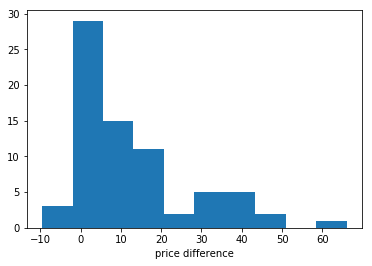

In [8]:
# Your code here
# ...

# Load data and take a look
textbook = pd.read_csv('./data/textbooks.csv',sep=',',decimal='.')
display(textbook.head())

plt.hist(textbook['diff'].values)
plt.xlabel('price difference')
plt.show

# This is a paired test, so our hypothesis would be H0: mu_diff = 0 vs H1: mu_diff != 0
# where mu_diff is the price difference mean value

# OPTION 1: Do the calculations
x = textbook['diff'].values
n = len(x)

t_statistic = x.mean()/sem(x)
p_value = 2*t(df=n-1).cdf(-np.abs(t_s))

print(t_statistic, p_value)

# OPTION 2: Use ttest_rel function
from scipy.stats import ttest_rel

a = textbook['ucla_new'].values
b = textbook['amaz_new'].values
t_statistic, p_value = ttest_rel(a,b)

print(t_statistic, p_value)

if p_value < 0.05:
    print('We reject the null hypothesis H0')
else:
    print('We accept the null hypothesis H0')

Notice that in this case, we could have used a test for the follwing hypothesis:
    
$$H_0: u_{\text{ucla}} = u_{\text{amazon}}\quad\text{vs}\quad H_1: u_{\text{ucla}} > u_{\text{amazon}}$$

which could be transformed into

$$H_0: u_{\text{ucla}} - u_{\text{amazon}} = 0 \quad\text{vs}\quad H_1: u_{\text{ucla}} - u_{\text{amazon}} > 0$$

so that

$$H_0: u_{\text{diff}} = 0 \quad\text{vs}\quad H_1: u_{\text{diff}}> 0$$

Which is a one-sample one-sided hypothesis.

# References

The examples from this notebook have been extracted from:

- [MAS113 Part 2: Data Science](http://www.jeremy-oakley.staff.shef.ac.uk/mas113/notes/), Jeremy-oakley. Chapter 7.
- [Statistical Inference for Data Science](https://leanpub.com/LittleInferenceBook/read#leanpub-auto-exercises-8). Brian Caffo. Chapter 9.
- [OpenIntro Statistics](https://www.openintro.org/book/os/). D. Díez, M Cetinkaya-Rundel and CD Barr. Chapter 7.